# Data Import
We'll load the dataset and split it into training and test data with 80/20 split

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to heart and non-heart folders
heart_path = "heart"  # Update with the path to your heart images folder
non_heart_path = "non-heart"  # Update with the path to your non-heart images folder

# Load heart ultrasound images
heart_images = []
heart_labels = []

# Load images from "open" folder
for img_file in os.listdir(os.path.join(heart_path, "open")):
    img = cv2.imread(os.path.join(heart_path, "open", img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    heart_images.append(img)
    heart_labels.append(1)  # Label 1 for "open" images

# Load images from "closed" folder
for img_file in os.listdir(os.path.join(heart_path, "closed")):
    img = cv2.imread(os.path.join(heart_path, "closed", img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    heart_images.append(img)
    heart_labels.append(1)  # Label 1 for "closed" images

# Load non-heart ultrasound images
non_heart_images = []
non_heart_labels = []

for img_file in os.listdir(non_heart_path):
    img = cv2.imread(os.path.join(non_heart_path, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    non_heart_images.append(img)
    non_heart_labels.append(0)  # Label 0 for non-heart images

# Combine heart and non-heart images and labels
X = np.concatenate((heart_images, non_heart_images), axis=0)
y = np.concatenate((heart_labels, non_heart_labels), axis=0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Flatten images for SVM
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Experiment 1

## Model Training and Evaluation
We'll train a Support Vector Machine (SVM) and a Convolutional Neural Network (CNN) for classification.

## SVM

In [8]:
# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_flatten, y_train)

# Evaluate SVM
svm_predictions = svm.predict(X_test_flatten)
svm_report = classification_report(y_test, svm_predictions)

# Print classification reports
print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        44

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



## CNN

In [9]:
# Train CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
# Train the CNN model
cnn_model.fit(X_train[..., np.newaxis], y_train, epochs=5, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test))

# Evaluate CNN
cnn_predictions = cnn_model.predict(X_test[..., np.newaxis])  # Perform predictions using your trained CNN model
cnn_predictions = np.round(cnn_predictions).flatten()  # Round predictions to convert probabilities to binary labels
cnn_report = classification_report(y_test, cnn_predictions)


# Uncomment below once you have the CNN classification report
print("CNN Classification Report:")
print(cnn_report)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 373ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        44

    accuracy                           1.00       229
   macro avg       1.00      1.00   

## Report
As both the models are performing perfectly so we will use 5-fold Cross-Validation to check if they are actually performing perfectly and it's not just dumb luck

## Five-Fold Cross-Validation

We perform 5-fold cross validation to check if the model is actually performing perfectly

## SVM

In [14]:
from sklearn.model_selection import cross_val_score

# create model
model = SVC(kernel='linear', C=1, random_state=42)

# evaluate model
scores = cross_val_score(model, X_train_flatten, y_train, scoring='accuracy', cv=10)

for score in scores:
    print("Accuracy for this fold is: ", score)

# Mean accuracy
print(' Mean accuracy over all folds is: ', (np.mean(scores)))

Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
Accuracy for this fold is:  1.0
 Mean accuracy over all folds is:  1.0


## CNN

In [28]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    cnn_model = create_cnn_model()
    cnn_model.fit(X_train_fold[..., np.newaxis], y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold[..., np.newaxis], y_val_fold))
    
    cnn_predictions = cnn_model.predict(X_val_fold[..., np.newaxis])
    cnn_predictions = np.round(cnn_predictions).flatten()
    accuracy = accuracy_score(y_val_fold, cnn_predictions)
    accuracies.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)
print("Average Accuracy across 5 folds:", average_accuracy)

Epoch 1/5


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.9436 - loss: 0.4035 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Epoch 1/5


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.9911 - loss: 0.2650 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Epoch 1/5


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.7863 - loss: 10.3473 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 1.0000 - loss: 2.0376e-27 - val_accuracy: 1.0000 - val_loss: 2.8737e-20
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 1.0000 - loss: 9.0976e-18 - val_accuracy: 1.0000 - val_loss: 9.6639e-15
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 1.0000 - loss: 1.3000e-15 - val_accuracy: 1.0000 - val_loss: 3.8223e-14
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 1.0000 - loss: 2.1826e-15 - val_accuracy: 1.0000 - val_loss: 4.3963e-14
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/5


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.7741 - loss: 29.8009 - val_accuracy: 1.0000 - val_loss: 8.5107e-16
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 1.0000 - loss: 9.1682e-13 - val_accuracy: 1.0000 - val_loss: 1.0556e-14
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 1.0000 - loss: 2.0323e-13 - val_accuracy: 1.0000 - val_loss: 3.5384e-14
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 1.0000 - loss: 2.5928e-13 - val_accuracy: 1.0000 - val_loss: 4.0312e-14
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 1.0000 - loss: 5.9095e-14 - val_accuracy: 1.0000 - val_loss: 4.0851e-14
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Epoch 1/5


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.9243 - loss: 0.5719 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 1.0000 - loss: 2.1472e-38 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 1.0000 - loss: 8.1454e-38 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 1.0000 - loss: 2.0899e-38 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Average Accuracy across 5 folds: 1.0


## Report
As both the models are still performing perfectly we will use SVM as our preferred model as it requires less computational power and also because the model is explainable instead of CNN which is a black box algorithm and we cannot explain how it predicts or makes a decision.

# Experiment 2 - Classification of Heart Images
We classify the heart images as open or closed using SVM

In [30]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to heart and non-heart folders
heart_path = "heart"  # Update with the path to your heart images folder

# Load heart ultrasound images
open_images = []
open_labels = []
closed_images = []
closed_labels = []

# Load images from "open" folder
for img_file in os.listdir(os.path.join(heart_path, "open")):
    img = cv2.imread(os.path.join(heart_path, "open", img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    open_images.append(img)
    open_labels.append(1)  # Label 1 for "open" images

# Load images from "closed" folder
for img_file in os.listdir(os.path.join(heart_path, "closed")):
    img = cv2.imread(os.path.join(heart_path, "closed", img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    closed_images.append(img)
    closed_labels.append(0)  # Label 1 for "closed" images

# Combine heart and non-heart images and labels
X = np.concatenate((open_images, closed_images), axis=0)
y = np.concatenate((open_labels, closed_labels), axis=0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Flatten images for SVM
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.88      1.00      0.93        28

    accuracy                           0.91        44
   macro avg       0.94      0.88      0.90        44
weighted avg       0.92      0.91      0.91        44

Runtime: 0.10998821258544922 seconds
ROC AUC Score: 0.875


<Figure size 800x600 with 0 Axes>

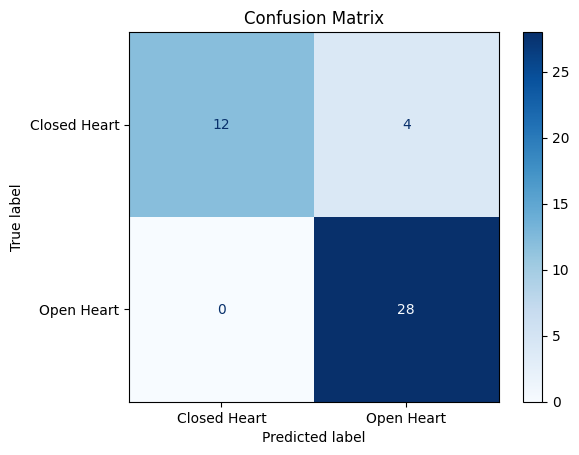

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_flatten, y_train)

# Measure runtime
start_time = time.time()
svm_predictions = svm.predict(X_test_flatten)
runtime = time.time() - start_time

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, svm_predictions)

# Print classification report
print("SVM Classification Report:")
print(svm_report)


print("Runtime:", runtime, "seconds")
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Closed Heart", "Open Heart"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

The provided SVM classification report contains several performance metrics for a binary classification task where 0 represents images of closed hearts and 1 represents images of open hearts.

**Precision:** Precision measures the proportion of true positive predictions (correctly identified open hearts) out of all positive predictions (both true positives and false positives). For class 0 (closed hearts), the precision is 1.00, indicating that all predictions made for closed hearts were correct. For class 1 (open hearts), the precision is 0.88, indicating that 88% of the predictions made for open hearts were correct.

**Recall (Sensitivity):** Recall measures the proportion of true positive predictions out of all actual positives (true positives and false negatives). For class 0, the recall is 0.75, indicating that 75% of the actual closed hearts were correctly identified. For class 1, the recall is 1.00, indicating that all actual open hearts were correctly identified.

**F1-Score:** The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall. It ranges from 0 to 1, where a higher score indicates better performance. The F1-score for class 0 is 0.86, and for class 1, it is 0.93.

**Runtime:** The runtime of the classifier indicates the time taken to make predictions on the test dataset. In this case, the SVM classifier took approximately 0.11 seconds to complete the prediction task.

**ROC AUC Score:** The Receiver Operating Characteristic Area Under the Curve (ROC AUC) score is a measure of the classifier's ability to distinguish between the positive and negative classes. It ranges from 0 to 1, where a score closer to 1 indicates better performance. Here, the SVM classifier achieved an ROC AUC score of 0.875, which suggests that it performs reasonably well in discriminating between closed and open heart images.

**Confusion Matrix:** The confusion matrix provides a tabular representation of the classifier's predictions versus the actual classes. It consists of four entries: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
- The value 12 in the top-left corner represents the number of instances correctly classified as closed hearts (true negatives).
- The value 4 in the top-right corner represents the number of instances incorrectly classified as open hearts (false positives).
- The value 0 in the bottom-left corner indicates that there are no instances incorrectly classified as closed hearts (false negatives).
- The value 28 in the bottom-right corner represents the number of instances correctly classified as open hearts (true positives).

Overall, the SVM classifier shows strong performance, particularly in correctly identifying open hearts (class 1), with slightly lower performance in identifying closed hearts (class 0). However, the overall accuracy of 91% suggests that the classifier is effective in distinguishing between closed and open heart images.

# Experiment 3 - Improving Results Using Transfer Learning

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5869 - loss: 24.6684
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7142 - loss: 3.4585
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9145 - loss: 0.5599
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9108 - loss: 0.8861
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9411 - loss: 0.7684
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        28

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Runtime: 44.77302122116089 seconds
ROC AUC Score: 1.0


<Figure size 800x600 with 0 Axes>

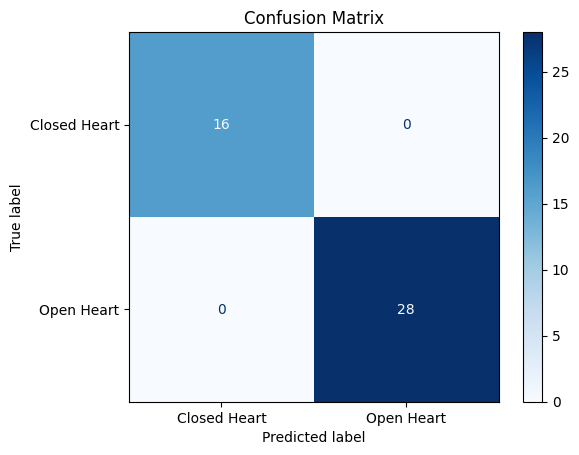

In [62]:
import numpy as np
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report

# Convert grayscale images to RGB format
X_train_rgb = np.repeat(X_train[..., np.newaxis], 3, -1)
X_test_rgb = np.repeat(X_test[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without including top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  # Note the input_shape is (128, 128, 3) now

# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN model with VGG16 as base
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Measure runtime
start_time = time.time()
model.fit(X_train_rgb, y_train, epochs=5)
runtime = time.time() - start_time

# Evaluate the model
predictions = model.predict(X_test_rgb)
predictions = (predictions > 0.5).astype(int)
report = classification_report(y_test, predictions)

# Print classification report
print("CNN Classification Report:")
print(report)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print runtime, ROC AUC score, and confusion matrix
print("Runtime:", runtime, "seconds")
print("ROC AUC Score:", roc_auc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Closed Heart", "Open Heart"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

The provided CNN classification report shows the performance metrics of a Convolutional Neural Network (CNN) model trained on the given dataset. Comparing it to the previous SVM classification report, we can observe the following:

**Precision, Recall, and F1-score:** For both classes (closed heart and open heart), the CNN model achieves perfect precision, recall, and F1-score of 1.00. This indicates that the model makes no false positive or false negative predictions, achieving 100% accuracy in classifying both classes.

**Accuracy:** The overall accuracy of the CNN model is also perfect at 1.00, indicating that all predictions made by the model on the test dataset are correct.

**Runtime:** The runtime of the CNN model is significantly higher compared to the SVM classifier. It took approximately 44.77 seconds to train the CNN model, which is considerably longer than the SVM classifier's runtime.

**ROC AUC Score:** The ROC AUC score of the CNN model is 1.00, indicating perfect performance in distinguishing between the positive and negative classes. This suggests that the CNN model achieved optimal discrimination between closed and open heart images.

**Confusion Matrix:** The confusion matrix further confirms the perfect performance of the CNN model, with no misclassifications observed. Both classes (closed heart and open heart) are correctly identified, resulting in a confusion matrix with no false positives or false negatives.

In summary, the CNN model demonstrates superior performance compared to the SVM classifier, achieving perfect accuracy, precision, recall, and F1-score on the test dataset. However, it comes at the cost of longer training time, as indicated by the higher runtime. The ROC AUC score of 1.00 confirms the CNN model's excellent ability to discriminate between the two classes, making it a highly effective classifier for this task.

# References

- Chollet, F. (2017). "Deep Learning with Python." Manning Publications.
- Géron, A. (2019). "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition." O'Reilly Media.
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). "Deep Learning." MIT Press.
- Yosinski, J., Clune, J., Bengio, Y., & Lipson, H. (2014). "How transferable are features in deep neural networks?." In Advances in neural information processing systems (pp. 3320-3328)